In [2]:
import pandas as pd
df_pass = pd.read_csv('clean-pass.txt')
df_pass.head()

,player,quint,home,team,opp,net%,netatt,ny,ny/a
0,Geno Smith,47,1,NYJ,MIA,0.363636,11.0,21.0,1.909091
1,Ryan Tannehill,47,0,MIA,NYJ,0.636364,44.0,328.0,7.454545
2,Brandon Weeden,47,1,CLE,JAX,0.558140,43.0,342.0,7.953488
3,Joe Flacco,47,1,BAL,PIT,0.648649,37.0,237.0,6.405405
4,Matt Flynn,47,0,GNB,DET,0.370370,27.0,102.0,3.777778


In [30]:
df_rush = pd.read_csv('clean-rush.txt')
df_rush.head()

,player,quint,home,team,opp,car,ry,ypc
0,Geno Smith,47,1,NYJ,MIA,1,2,2.000000
1,Ryan Tannehill,47,0,MIA,NYJ,3,22,7.333333
2,Brandon Weeden,47,1,CLE,JAX,2,5,2.500000
3,Joe Flacco,47,1,BAL,PIT,4,7,1.750000
4,Matt Flynn,47,0,GNB,DET,2,4,2.000000


In [35]:
df_score = pd.read_csv('clean-score.txt')
df_score.head()

,player,quint,home,team,opp,tds,tos
0,Geno Smith,47,1,NYJ,MIA,0,1
1,Ryan Tannehill,47,0,MIA,NYJ,2,1
2,Brandon Weeden,47,1,CLE,JAX,3,4
3,Joe Flacco,47,1,BAL,PIT,1,1
4,Matt Flynn,47,0,GNB,DET,0,3


In [33]:
# find the average for each stat in each quint
def find_avgs(dfmain, stats):

    # exclude postseason quints, so that some
    # QBs don't get overrepresented
    quints = sorted(dfmain['quint'].unique())
    ispost = lambda q: ((q + 1) % 5) == 0
    quints = [q for q in quints if not ispost(q)]

    # compute the averages
    avgs = []
    for q in quints:
        data = dict(quint=q)
        for s in stats:
            df = dfmain[dfmain['quint'] == q]
            data[s] = df[s].mean()
        avgs.append(data)
    
    return pd.DataFrame(avgs)

df_passavg = find_avgs(df_pass, ['net%', 'netatt', 'ny', 'ny/a'])
df_passavg.head()

,quint,net%,netatt,ny,ny/a
0,0,0.548707,29.575342,181.739726,6.016405
1,1,0.563722,31.589928,199.654676,6.365598
2,2,0.531472,29.260000,177.953333,5.805614
3,3,0.533222,28.699346,173.267974,5.916074
4,5,0.561340,30.374150,185.238095,6.330943


In [34]:
df_rushavg = find_avgs(df_rush, ['car', 'ry', 'ypc'])
df_rushavg.head()

,quint,car,ry,ypc
0,0,3.113043,10.747826,3.129082
1,1,2.991071,10.875000,3.799050
2,2,2.906250,10.734375,3.450906
3,3,2.785124,9.330579,3.280451
4,5,2.783333,10.700000,3.377001


In [36]:
df_scoreavg = find_avgs(df_score, ['tos', 'tds'])
df_scoreavg.head()

,quint,tos,tds
0,0,0.682432,1.108108
1,1,0.879433,1.382979
2,2,0.961538,1.358974
3,3,0.922581,1.232258
4,5,0.871622,1.195946


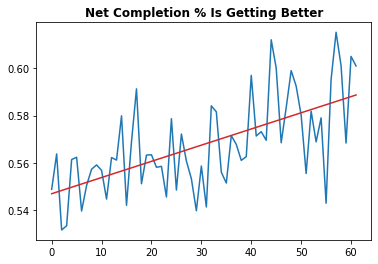

None

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def plot_change(x, y, title):
    bf = np.poly1d(np.polyfit(x, y, 1))(x)
    plt.plot(x, y)
    plt.plot(x, bf, color='C3')
    plt.title(title, fontweight='bold')
    display(plt.show())

plot_change(df_passavg.index, df_passavg['net%'],
            'Net Completion % Is Getting Better')

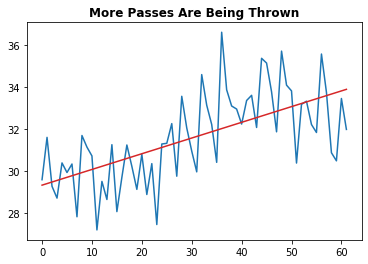

None

In [26]:
plot_change(df_passavg.index, df_passavg['netatt'], 'More Passes Are Being Thrown')

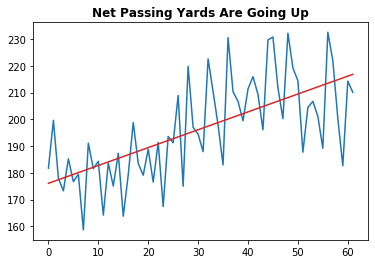

None

In [27]:
plot_change(df_passavg.index, df_passavg['ny'], 'Net Passing Yards Are Going Up')

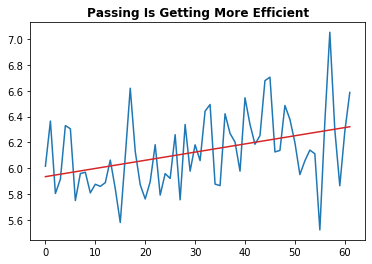

None

In [29]:
plot_change(df_passavg.index, df_passavg['ny/a'], 'Passing Is Getting More Efficient')

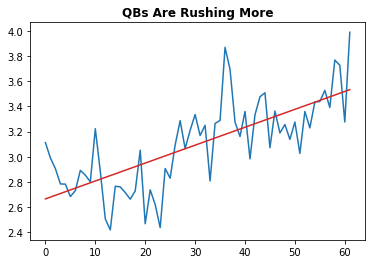

None

In [38]:
plot_change(df_rushavg.index, df_rushavg['car'], 'QBs Are Rushing More')

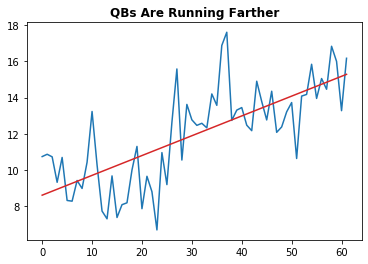

None

In [40]:
plot_change(df_rushavg.index, df_rushavg['ry'], 'QBs Are Running Farther')

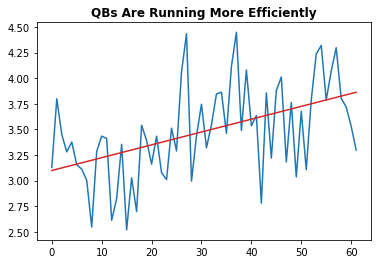

None

In [41]:
plot_change(df_rushavg.index, df_rushavg['ypc'], 'QBs Are Running More Efficiently')

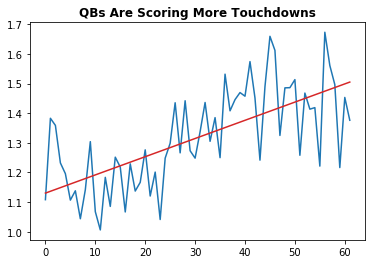

None

In [42]:
plot_change(df_scoreavg.index, df_scoreavg['tds'], 'QBs Are Scoring More Touchdowns')

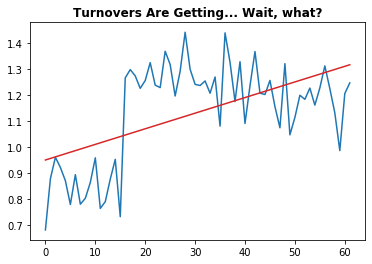

None

In [46]:
plot_change(df_scoreavg.index, df_scoreavg['tos'], 'Turnovers Are Getting... Wait, what?')

In [47]:
# Find the yearly averages for turnovers
dftos = df_scoreavg[['quint', 'tos']]
dftos.head()

,quint,tos
0,0,0.682432
1,1,0.879433
2,2,0.961538
3,3,0.922581
4,5,0.871622


In [52]:
dftos['year'] = dftos['quint'] // 5 + 2004
dftos = dftos[['year', 'tos']]
dftos.head()

,year,tos
0,2004,0.682432
1,2004,0.879433
2,2004,0.961538
3,2004,0.922581
4,2005,0.871622


In [59]:
dfto_avg = dftos.groupby('year').mean()
dfto_avg = dfto_avg.reset_index()
dfto_avg.head()

,year,tos
0,2004,0.861496
1,2005,0.831902
2,2006,0.848360
3,2007,0.839041
4,2008,1.266614


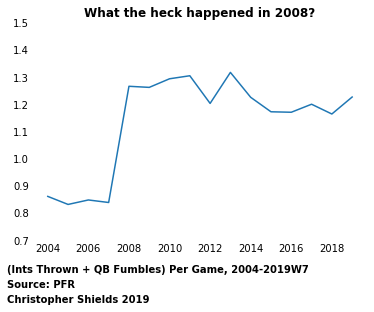

None

In [101]:
import warnings
warnings.filterwarnings('ignore')

plt.plot(dfto_avg['year'], dfto_avg['tos'])
plt.title('What the heck happened in 2008?', fontweight='bold')
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
plt.text(2002, 0.58, '(Ints Thrown + QB Fumbles) Per Game, 2004-2019W7', fontweight='bold')
plt.text(2002, 0.525, 'Source: PFR', fontweight='bold')
plt.text(2002, 0.47, 'Christopher Shields 2019', fontweight='bold')
plt.ylim(0.7, 1.5)
display(plt.show())

In [103]:
df_score_plus = pd.merge(df_pass, df_score)
df_score_plus

,player,quint,home,team,opp,tds,tos
0,Geno Smith,47,1,NYJ,MIA,0,1
1,Ryan Tannehill,47,0,MIA,NYJ,2,1
2,Brandon Weeden,47,1,CLE,JAX,3,4
3,Joe Flacco,47,1,BAL,PIT,1,1
4,Matt Flynn,47,0,GNB,DET,0,3
